In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

In [2]:
genre_data = pd.read_csv('Spotify Dataset/data_by_genres.csv')

In [3]:
genre_data.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [4]:
genre_data.drop('mode', axis=1, inplace=True)

In [5]:
genre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 13 columns):
genres              2973 non-null object
acousticness        2973 non-null float64
danceability        2973 non-null float64
duration_ms         2973 non-null float64
energy              2973 non-null float64
instrumentalness    2973 non-null float64
liveness            2973 non-null float64
loudness            2973 non-null float64
speechiness         2973 non-null float64
tempo               2973 non-null float64
valence             2973 non-null float64
popularity          2973 non-null float64
key                 2973 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 302.0+ KB


In [6]:
genre_data['duration_m'] = genre_data['duration_ms']/60000

In [8]:
genre_data.drop('duration_ms', axis=1, inplace=True)

In [10]:
X = genre_data[['valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
        'loudness', 'popularity', 'speechiness', 'tempo']]
X = StandardScaler().fit_transform(X)

In [11]:
X

array([[-1.92760907,  1.80819676, -2.48471886, ..., -0.72171978,
        -0.534628  , -2.50095032],
       [-1.34299618,  0.29257799, -1.57893122, ...,  0.7512771 ,
        -0.08414624,  0.0725367 ],
       [ 2.38991988,  1.12840682,  1.16044852, ...,  0.4825547 ,
        -0.45468043,  0.82589438],
       ...,
       [ 1.6421528 , -0.43158249,  1.40532576, ...,  0.40293325,
        -0.55685867, -0.97636875],
       [ 1.22036371,  1.85094428,  1.11840634, ..., -2.38381762,
         3.29415625, -1.58824723],
       [ 1.56500441,  0.0619243 ,  0.61218797, ..., -0.57669499,
        -0.41129413,  0.4206607 ]])

In [29]:
pca = PCA(n_components=2)
pc1 = pca.fit_transform(X)

array([[ 6.03454498, -0.48555078],
       [ 1.8990432 , -1.6571703 ],
       [-0.59877122,  0.67132505],
       ...,
       [-0.88043854,  1.26315976],
       [ 1.86539779,  4.06496196],
       [-0.92853759,  1.15405535]])

In [13]:
PCA_dataset1 = pd.DataFrame(data = pc1, columns = ['component1', 'component2'] )
PCA_dataset1.head()

,component1,component2
0,6.034545,-0.485551
1,1.899043,-1.657170
2,-0.598771,0.671325
3,1.054384,0.943893
4,0.837963,0.683106


In [14]:
principal_component1 = PCA_dataset1['component1']
principal_component2 = PCA_dataset1['component2']

<Figure size 432x288 with 0 Axes>

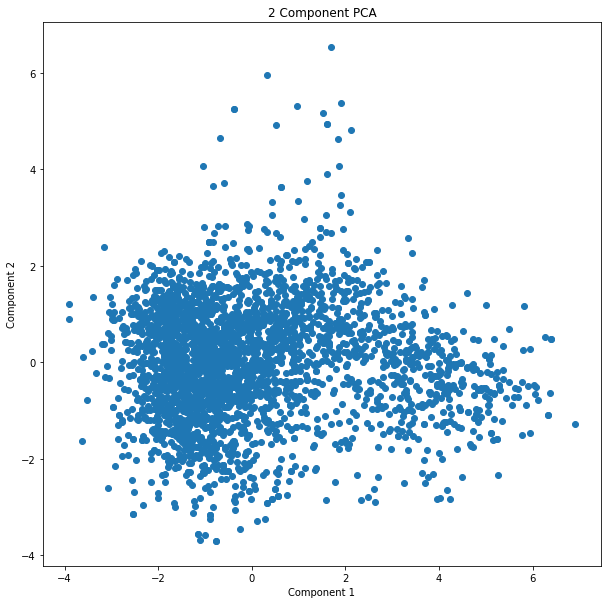

In [15]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(PCA_dataset1['component1'], PCA_dataset1['component2'])

In [17]:
Y = genre_data['key']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape)

(2081, 10) (2081,)
(892, 10)


In [42]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [43]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.27466367713004486


In [68]:
genre_data['key'].value_counts()

7     694
11    330
9     318
2     285
5     249
1     213
0     210
6     189
10    153
4     148
8      94
3      90
Name: key, dtype: int64

In [56]:
def transform_X(genre):
    ret = genre_data[genre_data['genres'] == genre]
    return ret

In [63]:
genre = transform_X('abstract')

5    0.307325
Name: valence, dtype: float64

In [65]:
# arr = [genre['valence'], genre['acousticness'], genre['danceability'], genre['energy'],
#                       genre['instrumentalness'], genre['liveness'], genre['loudness'], genre['popularity'],
#                       genre['speechiness'], genre['tempo']]

# arr

y_pred = knn.predict([arr])

KeyError: 0